In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generative models

### Bayesian Concept learning

In bayesian concept learning, we use only positive examples to learn.


### Number game

Given a set of numbers $\mathcal{D} = \{x_1,..., x_N \}$ coming from a mathematical concept $C$, like '*only prime numbers*' or '*powers of two*', we want to know if a new given number $\tilde{x}$ belongs to $C$. We represent this question as a probability distribution

$$
p(\tilde{x} | \mathcal{D}) \ \text{Probability of } \tilde{x} \in C
$$

Which is the so called ***posterior predictive distribution***. The posterior predictive distribution can be seen as the probability of a new datapoint $\tilde{x}$ given our already observed data $\mathcal{D}$.

We define $\mathcal{H}$ as our hypothesis space where $C(\mathcal{D}) \in \mathcal{H}$, meaning that $\mathcal{H}$ is consistent with our observed data. $\mathcal{H}$ contains then all possible concepts ($\mathcal{H}$ = {'odd', 'even', 'powers of two'}). The more data we have, the more we can rule out different Concepts in our hypothesis space, which narrows done the amount of possibilities.

#### Likelihood

Given the data, we want to see if picking one possible concept over another is better. Assuming that the samples $x_i$ are sampled uniformly at random from the extension of a concept (=set of numbers that belong to it), then the probability of sampling $x$ randomly from h is given by:

$$
\mathbb{P}(x | h) = \frac{1}{|h|}
$$

And then the probability of sampling (with replacement) N samples from h is given by:

$$
\mathbb{P}(\mathcal{D} | h) = \left( \frac{1}{|h|} \right)^N 
$$

For example, given $\mathcal{D} = \{ 16 \}$, then we get $\mathbb{P}(\mathcal{D} | h_{p-two}) = 1/6$ or $\mathbb{P}(\mathcal{D} | h_{even}) = 1/50$ for $|h| = 100$. For $\mathcal{D} = \{ 16, 8, 2, 64 \}$ we get $\mathbb{P}(\mathcal{D} | h_{p-two}) = (1/6)^4$ or $\mathbb{P}(\mathcal{D} | h_{even}) = (1/50)^4$. From this we can see that it's much more likely that our data came from the distribution of powers of two rather than from the even numbers. The likelihood ratio is 5000:1 in favor of $h_{p-two}$. Such models favor the simplest hypothesis which is consistent with the data (Occam's razor).

#### Prior

The prior is a way to formalize background knowledge. We might have some prior knowledge that we may want to introduce into our predictions. Like for example giving less weights to weird distributions like $h' = $ Powers of two except 32. This concept, given our data, is more likely than just powers of two but seems illogical to pick because of it's unnaturalness.

#### Bayes Formula

$$
\underbrace{\mathbb{P}(h | \mathcal{D})}_{\text{Posterior}} \leftarrow \underbrace{\mathbb{P}(\mathcal{D} | h)}_{\text{Likelihood}} \underbrace{\mathbb{P}(h)}_{\text{Prior}}
\Rightarrow \mathbb{P}(h | \mathcal{D}) = \frac{\mathbb{P}(\mathcal{D} | h) \mathbb{P}(h)}{\mathbb{P}(\mathcal{D})}
$$

#### Posterior

The posterior is basically the normalized product of the likelihood times the prior. The posterior here can be seen as the probability of the Concept $h$ given the observed data. 
With enough data, our posterior becomes a peak at a single concept, namely the ***MAP estimate***, or ***maximum a posteriori estimation***, which is the maximisation of the posterior. 
Thus a MAP estimate is finding $h$ for which the posterior is maximised. ($\delta$ here is the dirac function)

$$
\mathbb{P}(h | \mathcal{D}) \rightarrow \delta_{\hat{h}^{MAP}} (h), \quad \hat{h}^{MAP} = \arg \max_h \mathbb{P}(h | \mathcal{D}) 
=
\arg \max_h \left[ \log \mathbb{P}(\mathcal{D} | h) + \log \mathbb{P}(h)  \right] 
$$

For more data, the MAP converges to the MLE, because $\mathbb{P}(\mathcal{D}|h)$ dominates over $\mathbb{P(h)}$

$$
\hat{h}^{MLE} = \arg \max_h \mathbb{P}(\mathcal{D}|h) = \arg \max_h \log \mathbb{P}(\mathcal{D}|h)
$$

Because both the MLE and the MAP converge to the same hypothisis if it exists, we call them ***consistent estimators***.

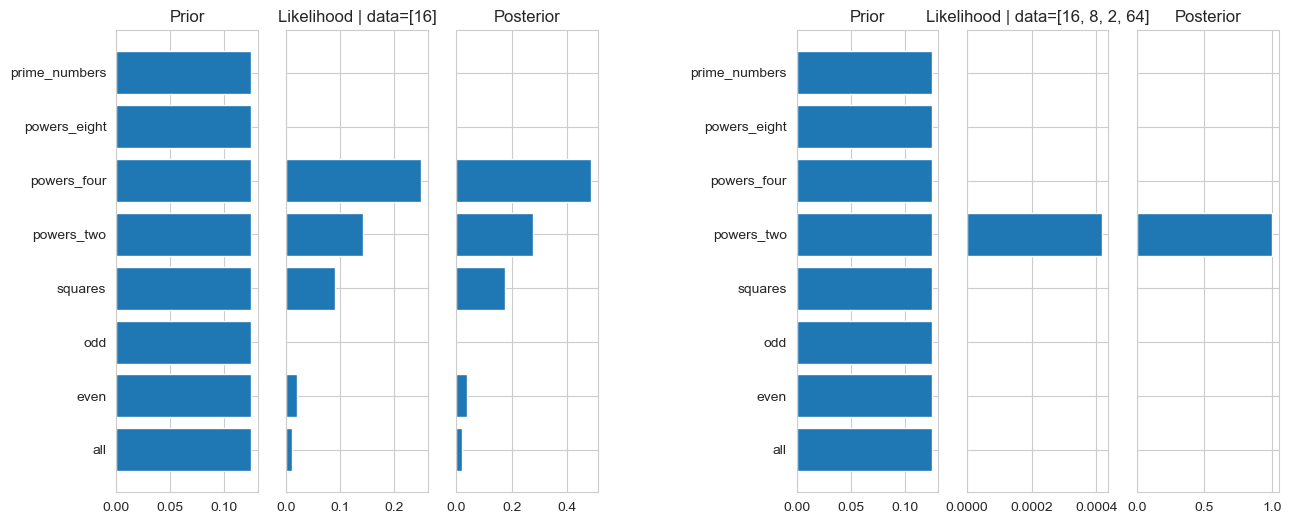

In [60]:
N = 100

all = [x for x in range(N + 1)]
even = [x for x in range(N + 1) if x % 2 == 0]
odd = [x for x in range(N + 1) if x % 2 != 0]
squares = [x**2 for x in range(N + 1) if x**2 <= 100]
powers_two = [2**x for x in range(N + 1) if 2**x <= 100]
powers_four = [4**x for x in range(N + 1) if 4**x <= 100]
powers_eight = [8**x for x in range(N + 1) if 8**x <= 100]
prime_numbers = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]

hypothesis_space = [all, even, odd, squares, powers_two, powers_four, powers_eight, prime_numbers]
hypothesis_space_names = ['all', 'even', 'odd', 'squares', 'powers_two', 'powers_four', 'powers_eight', 'prime_numbers']

data1 = [16]

prior = 1/len(hypothesis_space)
likelihood1 = []
for hypothesis in hypothesis_space:
    in_space = True
    for number in data1:
        if number not in hypothesis:
            in_space = False
            break
    if in_space:
        likelihood1.append((1 / len(hypothesis))**len(data1))
    else:
        likelihood1.append(0)
      
post1 = (likelihood1) / (np.sum(likelihood1))  

data2 = [16, 8, 2, 64]

prior = 1/len(hypothesis_space)
likelihood2 = []
for hypothesis in hypothesis_space:
    in_space = True
    for number in data2:
        if number not in hypothesis:
            in_space = False
            break
    if in_space:
        likelihood2.append((1 / len(hypothesis))**len(data2))
    else:
        likelihood2.append(0)
      
post2 = (likelihood2) / (np.sum(likelihood2))  
      
fig, axs = plt.subplots(1, 7, figsize=(15, 6))
axs[0].set_title('Prior')
axs[0].barh(hypothesis_space_names, prior)

axs[1].set_title(f'Likelihood | data={data1}')
axs[1].barh(hypothesis_space_names, likelihood1)
axs[1].set_yticklabels([])

axs[2].set_title('Posterior')
axs[2].barh(hypothesis_space_names, post1)
axs[2].set_yticklabels([])

axs[3].axis('off')

axs[4].set_title('Prior')
axs[4].barh(hypothesis_space_names, prior)

axs[5].set_title(f'Likelihood | data={data2}')
axs[5].barh(hypothesis_space_names, likelihood2)
axs[5].set_yticklabels([])

axs[6].set_title('Posterior')
axs[6].barh(hypothesis_space_names, post2)
axs[6].set_yticklabels([])

plt.show()

### Posterior predictive distribution

The posterior predictive distribution is given by 

$$
\mathbb{P}(\tilde{x} \in  C | \mathcal{D}) = \sum_h \mathbb{P}(\tilde{x} | h) \mathbb{P}(h | \mathcal{D})
$$

Thus the posterior predictive distribution can be thought of as, what is the probability of a new $\tilde{x}$ belonging to a given hypothisis which is calculated by summing over the total probability of $\tilde{x}$ given a hypothisis $h$, weighed by the probability of the hypothesis $h$, given the previous observed data. This is called bayes model averaging. It is basically a distribution for the future predicted data based on the already observed data, and  is used for the predicting of new data. If thus we have only a few samples, our posterior is a broad distribution and therefor the posterior predictive distribution aswell, which makes sense as predicting a model from a few datapoints is difficult because many models may accurately describe the date. For increasing datapoints we then get 

$$
\mathbb{P}(\tilde{x} \in  C | \mathcal{D}) = \sum_h \mathbb{P}(\tilde{x} | h) \delta_{\hat{h}^{MAP}} (h) = \mathbb{P}(\tilde{x} |
\hat{h})
$$

<BarContainer object of 101 artists>

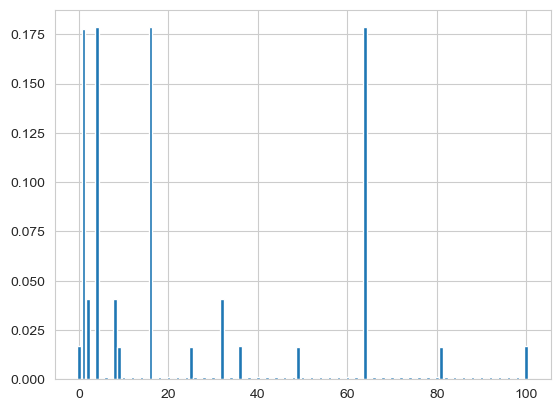

In [99]:
N = 100

all = [x for x in range(N + 1)]
even = [x for x in range(N + 1) if x % 2 == 0]
odd = [x for x in range(N + 1) if x % 2 != 0]
squares = [x**2 for x in range(N + 1) if x**2 <= 100]
powers_two = [2**x for x in range(N + 1) if 2**x <= 100]
powers_four = [4**x for x in range(N + 1) if 4**x <= 100]
powers_eight = [8**x for x in range(N + 1) if 8**x <= 100]
prime_numbers = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]

hypothesis_space = [all, even, odd, squares, powers_two, powers_four, powers_eight, prime_numbers]
hypothesis_space_names = ['all', 'even', 'odd', 'squares', 'powers_two', 'powers_four', 'powers_eight', 'prime_numbers']

data1 = [16]

prior = 1/len(hypothesis_space)
likelihood1 = []
for hypothesis in hypothesis_space:
    in_space = True
    for number in data1:
        if number not in hypothesis:
            in_space = False
            break
    if in_space:
        likelihood1.append((1 / len(hypothesis))**len(data1))
    else:
        likelihood1.append(0)
      
post1 = (likelihood1) / (np.sum(likelihood1))  

posterior_pred = []
for i in all:
    s = 0
    for hypothesis, post in zip(hypothesis_space, post1):
        if i in hypothesis:
            s += (1 / len(hypothesis)) * post
    posterior_pred.append(s)
posterior_pred /= np.sum(posterior_pred)
plt.bar(all, posterior_pred)